In [1]:
__title__ = "SML HW2 Q6"
__author__ = "Mohammadreza Ghofrani"
__stdid__ = "400131076"

In [2]:
import numpy as np
from scipy.stats import norm, uniform
from matplotlib import pyplot as plt

# Part a

In [3]:
n = 100
mu = 5
sigma = 1

X = np.random.normal(loc=mu, scale=sigma, size=n)

# Part b

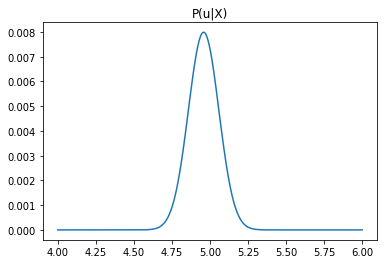

In [4]:
X_bar = np.mean(X)

f = lambda theta: 1
likelihood = lambda theta: np.prod(norm.pdf(X, loc=theta, scale=sigma))
posterior = np.vectorize(lambda theta: f(theta) * likelihood(theta))

x_axis = np.linspace(4, 6, 1000)
prob = posterior(x_axis)
plt.plot(x_axis, prob/prob.sum())
plt.title("P(u|X)")
plt.show()

# Part c

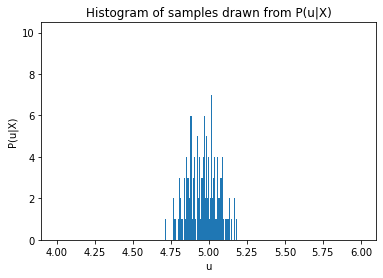

In [15]:
samples = np.random.choice(x_axis, p=prob / np.sum(prob), size=500)
plt.hist(samples, bins=x_axis, density=True, label="samples")
plt.title('Histogram of samples drawn from P(u|X)')
plt.xlabel('u')
plt.ylabel('P(u|X)')
plt.show()

# Part d

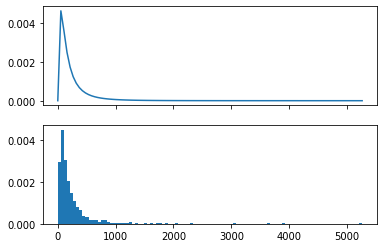

In [17]:
e_X = np.exp(norm.rvs(loc=np.mean(X), scale=sigma, size=1000))
f_z = np.vectorize(lambda z: norm.pdf(np.log(z) - X_bar)/z)

z = np.linspace(0.1, max(e_X), 100)
fz_values = f_z(z)

fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(z, fz_values)
ax2.hist(e_X, density=True, bins=z);

# Part e

In [20]:
print(f"97% posterior confidence interval: {np.quantile(e_X, 0.015):.2f}, {np.quantile(e_X, 0.985):.2f}")
print(f"93% posterior confidence interval: {np.quantile(e_X, 0.3):.2f}, {np.quantile(e_X, 0.97):.2f}")

97% posterior confidence interval: 16.06, 1238.79
93% posterior confidence interval: 84.72, 833.64
